**Step 1: Load and Preprocess the Data**

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/Heart Disease - Heart Disease.csv')

# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100833 entries, 0 to 100832
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      100833 non-null  object 
 1   BMI               100833 non-null  float64
 2   Smoking           100833 non-null  object 
 3   AlcoholDrinking   100833 non-null  object 
 4   Stroke            100833 non-null  object 
 5   PhysicalHealth    100833 non-null  int64  
 6   MentalHealth      100833 non-null  int64  
 7   DiffWalking       100833 non-null  object 
 8   Sex               100833 non-null  object 
 9   AgeCategory       100833 non-null  object 
 10  Race              100832 non-null  object 
 11  Diabetic          100832 non-null  object 
 12  PhysicalActivity  100832 non-null  object 
 13  GenHealth         100832 non-null  object 
 14  SleepTime         100832 non-null  float64
 15  Asthma            100832 non-null  object 
 16  KidneyDisease     10

**Step 2: Data Cleaning and Transformation**

In [2]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical using label encoding
label_encoder = LabelEncoder()

categorical_columns = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# Convert categorical variables to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'AgeCategory', 'Race'], drop_first=True)

# Convert 'HeartDisease' column to binary (1: Yes, 0: No)
data['HeartDisease'] = data['HeartDisease'].apply(lambda x: 1 if x == 'Yes' else 0)

# Check for missing values and handle them if necessary
print(data.isnull().sum())

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_columns = ['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

HeartDisease               0
BMI                        0
Smoking                    0
AlcoholDrinking            0
Stroke                     0
PhysicalHealth             0
MentalHealth               0
DiffWalking                0
Diabetic                   0
PhysicalActivity           0
GenHealth                  0
SleepTime                  1
Asthma                     0
KidneyDisease              0
SkinCancer                 0
Sex_Male                   0
AgeCategory_25-29          0
AgeCategory_30-34          0
AgeCategory_35-39          0
AgeCategory_40-44          0
AgeCategory_45-49          0
AgeCategory_50-54          0
AgeCategory_55-59          0
AgeCategory_60-64          0
AgeCategory_65-69          0
AgeCategory_70-74          0
AgeCategory_75-79          0
AgeCategory_80 or older    0
Race_Asian                 0
Race_Black                 0
Race_Hispanic              0
Race_Other                 0
Race_White                 0
dtype: int64


**Step 3: Balance the Classes (Fix Class Imbalance)**

In [3]:
from imblearn.under_sampling import RandomUnderSampler

# Separate features and target variable
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Apply random undersampling to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

**Step 4: Feature Importance Analysis using Random Forest**

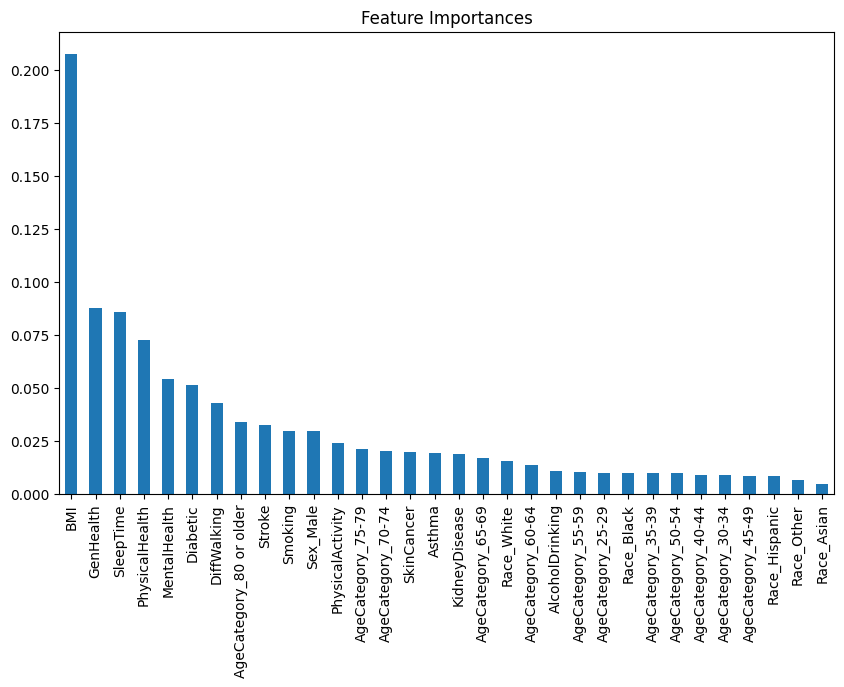

In [4]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Plot feature importances
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

In [5]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Display feature importances for each feature
for feature_name, importance in zip(X.columns, feature_importances):
    print(f"{feature_name}: {importance}")

BMI: 0.20773543119796611
Smoking: 0.029689376659355903
AlcoholDrinking: 0.010500490025898373
Stroke: 0.03227133496293034
PhysicalHealth: 0.07249780465979706
MentalHealth: 0.054245386736276595
DiffWalking: 0.0429042931643079
Diabetic: 0.05139007810284225
PhysicalActivity: 0.02363721229373664
GenHealth: 0.08761059184901239
SleepTime: 0.0856854028080555
Asthma: 0.01891904974116709
KidneyDisease: 0.01863136807828416
SkinCancer: 0.019541788463066426
Sex_Male: 0.02947127196981657
AgeCategory_25-29: 0.009892057021638374
AgeCategory_30-34: 0.008663716827086915
AgeCategory_35-39: 0.009609968987971243
AgeCategory_40-44: 0.008863495390335312
AgeCategory_45-49: 0.008486447193609623
AgeCategory_50-54: 0.009481044290997602
AgeCategory_55-59: 0.01028663808112333
AgeCategory_60-64: 0.013646875764444344
AgeCategory_65-69: 0.016932876627181917
AgeCategory_70-74: 0.020173438811211555
AgeCategory_75-79: 0.020943516879188374
AgeCategory_80 or older: 0.033877893242393896
Race_Asian: 0.004516796121150181
Rac

# FEATURE ANALYSIS:

1.BMI,
2.PhysicalHealth,
3.GenHealth,
4.SleepTime,
5.MentalHealth,
6.AgeCategory_80 or older,
7.DiffWalking,
8.AgeCategory_70-74,
9.AgeCategory_75-79,
10.AgeCategory_60-64,
11.Stroke,
12.Diabetic.
#These features have relatively higher importance values and are likely to have a more significant effect on the likelihood of heart disease based on the Random Forest analysis.

**Logistic Regression, SVM Classifier, K Neighbors Classifier, XGB Classifier, AdaBoost Classifier, Random Forest Classifier, Decision Tree Classifier, MLP Classifier**

In [6]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = clf.score(X_test, y_test)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{report}\n{'='*50}\n") #0: No Heart Disease, 1: Heart Disease


Classifier: Logistic Regression
Accuracy: 0.7366
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1721
           1       0.73      0.75      0.74      1742

    accuracy                           0.74      3463
   macro avg       0.74      0.74      0.74      3463
weighted avg       0.74      0.74      0.74      3463


Classifier: SVM
Accuracy: 0.7554
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1721
           1       0.73      0.81      0.77      1742

    accuracy                           0.76      3463
   macro avg       0.76      0.76      0.75      3463
weighted avg       0.76      0.76      0.75      3463


Classifier: k-Nearest Neighbors
Accuracy: 0.7202
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1721
           1       0.72      0.72  